In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
%matplotlib inline

In [2]:
base_dir = "/Users/Jackie/Dropbox/Work/machine_learning/hw/machine-learning-ex6/ex6"

In [3]:
data = loadmat(os.path.join(base_dir, 'ex6data1'))

In [11]:
X = data['X']
y = data['y'][:, 0]
print(X.shape, y.shape)

(51, 2) (51,)


In [35]:
def plotData(X, y):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(X[y == 1,0], X[y == 1,1], s=50, c='b', marker='+', label='positive')
    ax.scatter(X[y == 0,0], X[y == 0,1], s=50, c='y', marker='o', label='negative')
    ax.legend()
    return ax



In [268]:
from sklearn import svm
svc1 = svm.SVC( C=1, kernel='linear', max_iter=5000)
svc100 = svm.SVC( C=100, kernel='linear', max_iter=5000)


In [49]:
svc1.fit(X, y)
svc100.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=5000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
print(svc1.score(X,y), svc100.score(X,y))

0.9803921568627451 1.0


In [228]:

def plotBoundaryDecision(svc, X, y):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min(), X[:, 0].max() 
    y_min, y_max = X[:, 1].min(), X[:, 1].max() 
    h = .02  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])    
    ax = plotData(X, y)    
    # Put the result into a color plot    
    #print(Z.shape, xx.ravel().shape, yy.ravel().shape)
    Z = Z.reshape(xx.shape)
    CS = ax.contour(xx, yy, Z, levels=[0.5])
    CS = ax.contour(xx, yy, Z)
    ax.clabel(CS, inline=2, fontsize=10)
    

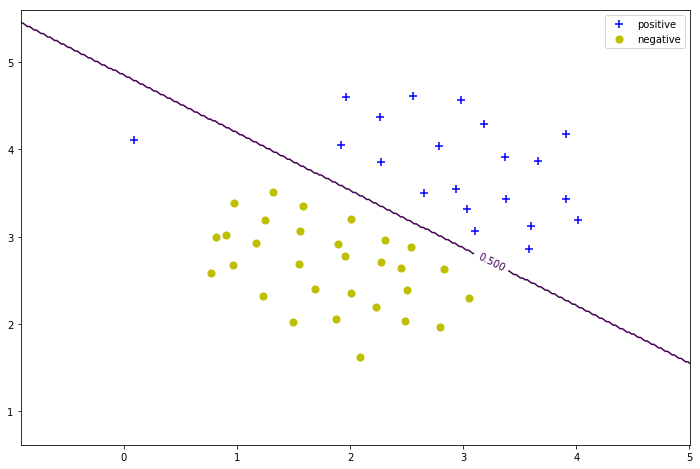

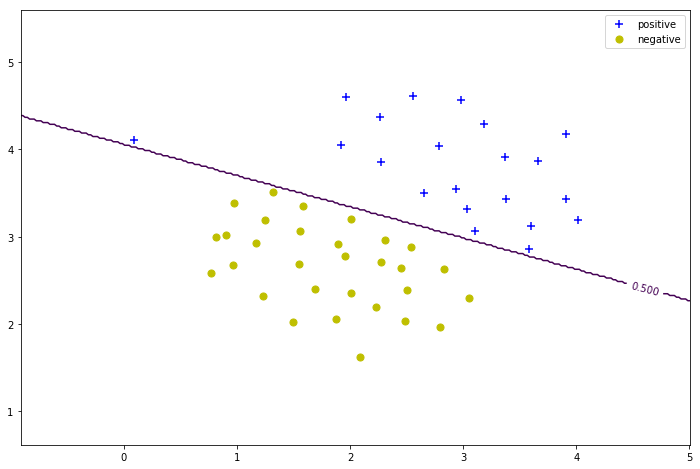

In [51]:
plotBoundaryDecision(svc1, X, y)
plotBoundaryDecision(svc100, X, y)

In [218]:
def gaussianKernel(x1, x2, sigma):
#     x1 = np.ravel(x1)
#     x2 = np.ravel(x2)
#     return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

    if len(x1.shape) == 1:
        x1 = x1.reshape(1, x1.shape[0])
    if len(x2.shape) == 1:
        x2 = x2.reshape(1, x2.shape[0])        
        
    m = x1.shape[0]
    n = x2.shape[0]
    res = np.zeros((m, n)) 
    
    for i in range(m):
        for j in range(n):
            e1 = x1[i, :]
            e2 = x2[j, :]
            res[i, j]= np.exp(-(np.sum((e1 - e2) ** 2) / (2 * (sigma ** 2))))
            
    return res         
    

In [235]:
# verify gaussian 
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2 
print(gaussianKernel(x1, x2, sigma))

[[0.32465247]]


In [74]:
data2 = loadmat(os.path.join(base_dir, 'ex6data2'))
X2 = data2['X']
y2 = data2['y'][:, 0]
print(X2.shape, y2.shape)

(863, 2) (863,)


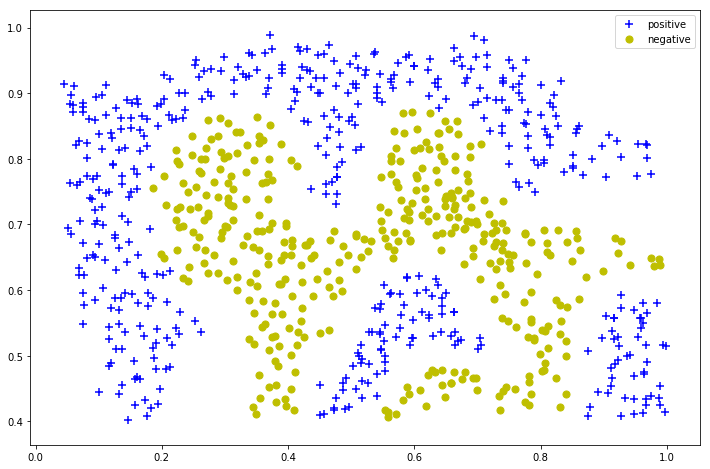

In [75]:
plotData(X2, y2)    

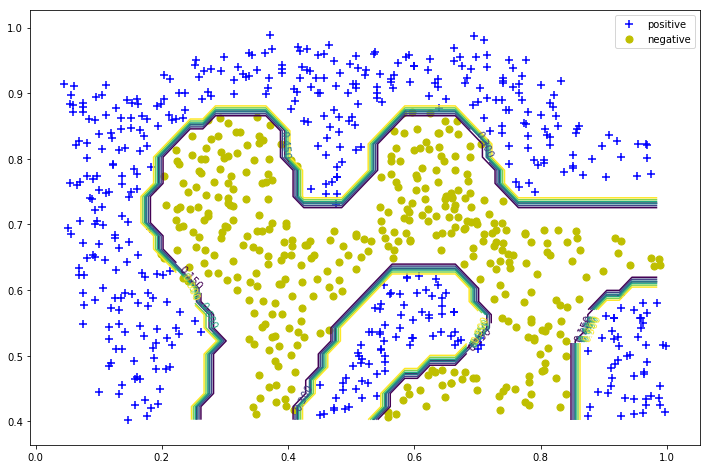

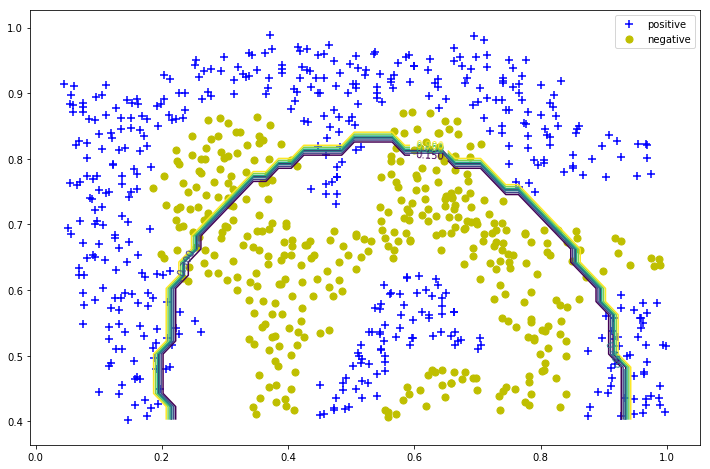

In [356]:
C = 1
sigma = 0.1

# self defined guassianKernel is very slow!
gamma = 1/(2*sigma**2)
svc1_guassian = svm.SVC(C=C, kernel='rbf', gamma=gamma, max_iter=5000)
# svc1_guassian = svm.SVC(C=C, kernel=lambda x, y: gaussianKernel(x, y, sigma), max_iter=5000)
svc1_guassian.fit(X2,y2)
plotBoundaryDecision(svc1_guassian, X2, y2)

C = 1
sigma = 1

# self defined guassianKernel is very slow!
gamma = 1/(2*sigma**2)
svc1_guassian = svm.SVC(C=C, kernel='rbf', gamma=gamma, max_iter=5000)
# svc1_guassian = svm.SVC(C=C, kernel=lambda x, y: gaussianKernel(x, y, sigma), max_iter=5000)
svc1_guassian.fit(X2,y2)
plotBoundaryDecision(svc1_guassian, X2, y2)

In [170]:
data3 = loadmat(os.path.join(base_dir, 'ex6data3'))
X3 = data3['X']
y3 = data3['y'].ravel()
Xval = data3['Xval']
yval = data3['yval'].ravel()
print(X3.shape, y3.shape, Xval.shape, yval.shape)

(211, 2) (211,) (200, 2) (200,)


In [344]:
def dataset3Params(X, y, Xval, yval):
    """self defined 2 fold grid search"""
    import pandas as pd 
    C_values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]) 
    sigma_values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]) 
    gamma_values = 1/(2*sigma_values**2)

    best_score = 0
    bestC = None
    bestGamma = None

    scores = []
    for C in C_values:
        for sigma in sigma_values:
            gamma = 1/(2*sigma**2)
            svc = svm.SVC(C=C, gamma=gamma)
#             svc = svm.SVC(C=C, kernel=lambda x, y: gaussianKernel(x, y, sigma), max_iter=5000)

            # 2 fold
            svc.fit(X, y)
            score0 = svc.score(Xval, yval)             
            svc.fit(Xval, yval)
            score1 = svc.score(X, y)        
            score = (score0+score1)/2        
        
            scores.append([score, C, gamma])
            
            if score >= best_score:
                best_score = score
                bestC = C
                bestGamma = gamma
    df = pd.DataFrame(scores, columns=['Score', 'C', 'gamma'])
    df = df.sort_values('Score', ascending=False)
    return df

In [345]:
scores = dataset3Params(X3, y3, Xval, yval)
print("top 5 scores:")
print(scores.head(5))

top 5 scores:
       Score     C      gamma
66  0.951564  30.0   5.555556
29  0.946825   0.3  50.000000
57  0.946694  10.0   5.555556
47  0.944585   3.0  50.000000
38  0.944585   1.0  50.000000


In [358]:
def defaultCrossValidationParams(X, y):
    """
        use sklearn to have GridSearchCV
    """
    import sklearn.model_selection as ms
    C_values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]) 
    sigma_values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]) 
    gamma_values = 1/(2*sigma_values**2)

    # Create my estimator and prepare the parameter grid dictionary
    params_dict = {"C": C_values, "gamma": gamma_values}
    svc = svm.SVC(kernel="rbf")

    # Fit the grid search
    search = ms.GridSearchCV(cv=2,estimator=svc, param_grid=params_dict)
    search.fit(X, y)

    return search 
    
search = defaultCrossValidationParams(np.vstack([X3, Xval]), np.concatenate([y3, yval]))    
print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

df = pd.DataFrame(search.cv_results_)
df.sort_values('mean_test_score', ascending=False).head()


Best parameter values: {'C': 10.0, 'gamma': 5.555555555555555}
CV Score with best parameter values: 0.9318493961638645


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
57,0.001033,0.000050,0.000600,0.000019,10,5.55556,"{'C': 10.0, 'gamma': 5.555555555555555}",0.941748,0.921951,0.931849,0.009898,1
66,0.001878,0.000910,0.000717,0.000113,30,5.55556,"{'C': 30.0, 'gamma': 5.555555555555555}",0.936893,0.912195,0.924544,0.012349,2
48,0.000790,0.000031,0.000716,0.000014,3,5.55556,"{'C': 3.0, 'gamma': 5.555555555555555}",0.917476,0.926829,0.922152,0.004677,3
38,0.001905,0.000193,0.001171,0.000021,1,50,"{'C': 1.0, 'gamma': 49.99999999999999}",0.932039,0.912195,0.922117,0.009922,4
29,0.001874,0.000237,0.001409,0.000015,0.3,50,"{'C': 0.3, 'gamma': 49.99999999999999}",0.922330,0.917073,0.919702,0.002628,5


In [272]:
svc_opt = svm.SVC(C=C, gamma=gamma)
svc_opt.fit(X3, y3)

SVC(C=3.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

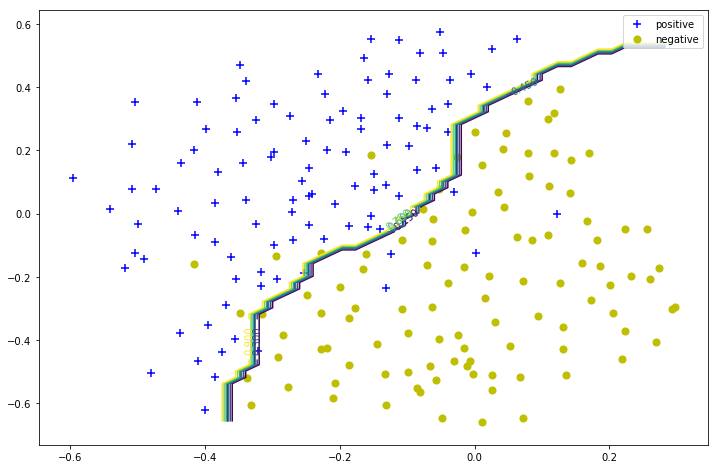

In [273]:
plotBoundaryDecision(svc_opt, X3, y3)

# spam classification 

In [188]:
spamTest = loadmat(os.path.join(base_dir, 'spamTest'))
spamTrain = loadmat(os.path.join(base_dir, 'spamTrain'))

In [191]:
Xtest = spamTest['Xtest']
ytest = spamTest['ytest'].ravel()
Xtrain = spamTrain['X']
ytrain = spamTrain['y'].ravel()

In [193]:
Xtest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [194]:
import scipy
scipy.stats.describe(Xtest)

DescribeResult(nobs=1000, minmax=(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)), mean=array([0.005, 0.005, 0.042, ..., 0.008, 0.008, 0.023]), variance=array([0.00497998, 0.00497998, 0.04027628, ..., 0.00794394, 0.00794394,
       0.02249349]), skewness=array([14.03584786, 14.03584786,  4.56654849, ..., 11.04572607,
       11.04572607,  6.36410263]), kurtosis=array([195.00502513, 195.00502513,  18.85336515, ..., 120.00806452,
       120.00806452,  38.50180232]))

In [203]:
svm_linear = svm.SVC( C=0.1, kernel='linear', max_iter=500)
svm_gaussian = svm.SVC( C=0.1, kernel='rbf', max_iter=500)
svm_linear.fit(Xtrain, ytrain)
svm_gaussian.fit(Xtrain, ytrain)
print('Training accuracy = {0}%'.format(np.round(svm_linear.score(Xtrain, ytrain) * 100, 2)))
print('Training accuracy = {0}%'.format(np.round(svm_gaussian.score(Xtrain, ytrain) * 100, 2)))

/Users/Jackie/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/Jackie/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training accuracy = 99.82%
Training accuracy = 98.28%


In [204]:
print('Test accuracy = {0}%'.format(np.round(svm_linear.score(Xtest, ytest) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svm_gaussian.score(Xtest, ytest) * 100, 2)))

Test accuracy = 98.9%
Test accuracy = 98.0%


In [212]:
def getVocalbList():
    with open(os.path.join(base_dir, 'vocab.txt')) as infile:
        res = infile.readlines()
        vocablist = {e.split()[0] : e.split()[1]  for e in res}
    return vocablist         

In [359]:
with open(os.path.join(base_dir, 'emailSample1.txt')) as infile:
    res = infile.readlines()
res = "".join(res).split()

# def processEmail(email_contents):